<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("nycflights13")
library(tidyverse)
library(nycflights13)
options(repr.plot.width=5, repr.plot.height=4)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# STATS 306
## Homework 2:  Using `dplyr`

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Naming frequency (4 points)
Problem 1 is based on the `babynames` data set that we saw in lecture:

In [ ]:
install.packages("babynames")
library(babynames)
summary(babynames)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



      year          sex                name                 n          
 Min.   :1880   Length:1924665     Length:1924665     Min.   :    5.0  
 1st Qu.:1951   Class :character   Class :character   1st Qu.:    7.0  
 Median :1985   Mode  :character   Mode  :character   Median :   12.0  
 Mean   :1975                                         Mean   :  180.9  
 3rd Qu.:2003                                         3rd Qu.:   32.0  
 Max.   :2017                                         Max.   :99686.0  
      prop          
 Min.   :2.260e-06  
 1st Qu.:3.870e-06  
 Median :7.300e-06  
 Mean   :1.363e-04  
 3rd Qu.:2.288e-05  
 Max.   :8.155e-02  

**(a)** What were the top five most popular names for boys and girls in 1925? _1 point_

In [ ]:
# Solution:

 babynames%>%
  filter(year==1925 & sex=="M")%>%
  top_n(5)%>%
  print

babynames%>%
  filter(year==1925 & sex=="F")%>%
  top_n(5)%>%
  print

# The top 5 most popular names for boys: Robert, John, William, James, Charles
# Top 5 most popular names for girls: Mary, Dorothy, Betty, Helen, Margaret 

Selecting by prop


# A tibble: 5 × 5
   year sex   name        n   prop
  <dbl> <chr> <chr>   <int>  <dbl>
1  1925 M     Robert  60896 0.0529
2  1925 M     John    57197 0.0497
3  1925 M     William 53303 0.0463
4  1925 M     James   52681 0.0458
5  1925 M     Charles 29581 0.0257


Selecting by prop


# A tibble: 5 × 5
   year sex   name         n   prop
  <dbl> <chr> <chr>    <int>  <dbl>
1  1925 F     Mary     70597 0.0559
2  1925 F     Dorothy  38570 0.0305
3  1925 F     Betty    32813 0.0260
4  1925 F     Helen    29170 0.0231
5  1925 F     Margaret 24464 0.0194


**(b)** Use `ggplot` to create a plot of the frequency of the name "Arya" over the years among boys and girls, respectively. Does anything noteworthy jump out at you from the plot? Can you explain why this happened? _1 point_

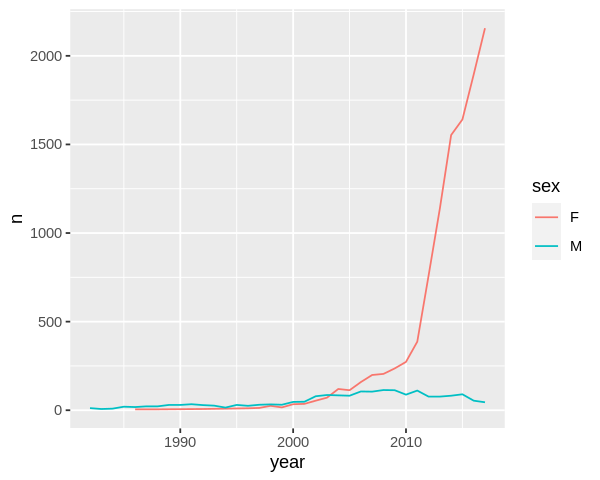

In [ ]:
# Solution:

babynames%>%
  filter(name=="Arya")%>%
  ggplot(aes(x=year,y=n,color=sex))+
  geom_line()

# The noteworthy thing from this plot is that the name "Arya" used to be common
# amongst both males and females, but eventually, it became a dominantly female 
# name, starting around 2003. Something must have happened around 2003, perhaps in
# pop culture that caused "Arya" to be associated with females. 

**(c)** Define a name to be "timeless" if it was among the ten most popular names in both 2015 and 1915. How many timeless names are there, and what are they? _2 points_

In [ ]:
# Solution:

df1<-babynames%>%
  filter(year=="2015")%>%
  top_n(10)%>%
  count(name)

df2<-babynames%>%
  filter(year=="1915")%>%
  top_n(10)%>%
  count(name)

intersect(df1,df2)

# Only one timeless name: William 

Selecting by prop
Selecting by prop


name,n
<chr>,<int>
William,1


## Problem 2: Manipulating `flights` (4 points)
This problem contines with the `flights` table that we saw this week in lecture. Recall that we first need to load this database by typing:

In [ ]:
library(nycflights13)

(If you are running on Google Colab, you will also need to install this package each time you start the notebook.)

**(a)** Use `filter()` to find all the flights that had an arrival delay of more than two hours. How many of these flights were there? *1/2 point*

In [ ]:
# Solution:

flights%>%
  filter(arr_delay>120)%>%
  count

# 10,034 flights had an arrival delay of more than two hours 

n
<int>
10034


**(b)** Was there a flight scheduled on every day of 2013? If so, write code that verifies this. If not, write code that shows which days had no scheduled flights. *1/2 point*

In [ ]:
# Solution:

flights%>%
  filter(year==2013,na.rm=TRUE)%>%
  group_by(year,month,day)%>%
  distinct(day)%>%
  nrow

# 365 days so yes, there was a flight scheduled on every day of 2013 

[1] 365

**(c)** Say you want to maximize your chance of taking a flight that leaves on time (or early). Which airport and carrier should you choose? (For example, "UA departing out of EWR"). Support your reasoning with code. 1 point

In [ ]:
# Solution:

# Proportion Early Angle:
flights%>%
  mutate(early=if_else(dep_delay<=0, 1, 0, missing=NULL))%>%
  group_by(origin,carrier)%>%
  summarize(reliability=mean(early))%>%
  filter(!is.na(reliability))%>%
  arrange(desc(reliability))%>%
  print

# Proportion Delayed Angle: 
flights%>%
  group_by(carrier,origin)%>%
  summarize(delayed=sum(dep_delay>0,na.rm=TRUE),total_count=n(),.before=1)%>%
  mutate(prop_delayed=delayed/total_count)%>%
  arrange(prop_delayed)%>%
  print

# HA departing out of JFK if you want to maximize your chance of taking a flight that leaves early 

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


# A tibble: 2 × 3
# Groups:   origin [2]
  origin carrier reliability
  <chr>  <chr>         <dbl>
1 JFK    HA            0.798
2 EWR    OO            0.5  


`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


# A tibble: 35 × 6
# Groups:   carrier [16]
   carrier origin delayed total_count .before prop_delayed
   <chr>   <chr>    <int>       <int>   <dbl>        <dbl>
 1 HA      JFK         69         342       1        0.202
 2 9E      EWR        267        1268       1        0.211
 3 US      LGA       2831       13136       1        0.216
 4 US      EWR       1000        4405       1        0.227
 5 OO      LGA          6          26       1        0.231
 6 AA      LGA       4168       15459       1        0.270
 7 AA      EWR        968        3487       1        0.278
 8 MQ      LGA       4777       16928       1        0.282
 9 9E      LGA        720        2541       1        0.283
10 DL      EWR       1313        4342       1        0.302
# … with 25 more rows


**(d)** What time of day should you fly if you want to avoid delays as much as possible? _2 points_ (This question is intentionally open-ended. There is no one correct answer. Use the data and the commands we have learned to argue your case.)

In [ ]:
# Solution:

df3<-flights
df3$delay<-if_else(df3$dep_delay>=0,1,0)
table(df3$delay) # There were 183,575 not delayed flights 

df4<-filter(df3,delay==0) # New df with only not delayed flights 

df4$hour<-if_else((df4$dep_time %in% 4:459),4,
if_else((df4$dep_time %in% 5:559),5,
if_else((df4$dep_time %in% 6:659),6,
if_else((df4$dep_time %in% 7:759),7,
if_else((df4$dep_time %in% 8:859),8,
if_else((df4$dep_time %in% 9:959),9,
if_else((df4$dep_time %in% 10:1059),10,
if_else((df4$dep_time %in% 11:1159),11,
if_else((df4$dep_time %in% 12:1259),12,
if_else((df4$dep_time %in% 13:1359),13,
if_else((df4$dep_time %in% 14:1459),14,
if_else((df4$dep_time %in% 15:1559),15,
if_else((df4$dep_time %in% 16:1659),16,
if_else((df4$dep_time %in% 17:1759),17,
if_else((df4$dep_time %in% 18:1859),18,
if_else((df4$dep_time %in% 19:1959),19,
if_else((df4$dep_time %in% 20:2059),20,
if_else((df4$dep_time %in% 21:2159),21,
if_else((df4$dep_time %in% 22:2259),22,
if_else((df4$dep_time %in% 23:2359),23,0)))))))))))))))))))) # New variable that counts the number of not delayed flights for each hour 

df4%>%
  count(hour)%>%
  arrange(desc(n))%>%
  print 

# The highest number of not delayed flights occurred at 8am, so maybe that is the best time to fly to avoid delays


     0      1 
183575 144946 

# A tibble: 20 × 2
    hour     n
   <dbl> <int>
 1     8 18818
 2     6 17088
 3     7 15617
 4     9 12311
 5    14 11813
 6    11 11168
 7    15 11046
 8    16 10548
 9    10 10256
10    18 10176
11    12  9536
12    17  9422
13    13  8842
14    19  8470
15     5  6772
16    20  6457
17    21  3152
18    22  1257
19    23   521
20     4   305


## Problem 3: Challenge problem (3 points)
Define a flight to be *spooky* if it was in transit at 13:13h (i.e. 1:13pm) on Friday the 13th of any month. You should assume that a flight is in transit between its `dep_time` and its `arr_time`. How many spooky flights are there in the dataset?

In [ ]:
# Solution: 

df5<-flights
df5<-filter(df5, (month==12 & day==13) | (month==9 & day==13))
glimpse(df5) # 1966 total flights occurred on 9/13/13 & 12/13/13

df5$transit<-if_else((df5$dep_time<=1313)&(df5$arr_time>=1313),1,0) # New variable that says whether the flights were in transit at 13:13

df6<-filter(df5,!is.na(transit)) 

df6%>%
  count(transit)%>%
  print 

# 236 flights were in transit at 13:13 on the Fridays the 13th

Rows: 1,966
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,…
$ day            <int> 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,…
$ dep_time       <int> 15, 120, 455, 518, 540, 540, 547, 551, 552, 555, 555, 5…
$ sched_dep_time <int> 2359, 2159, 500, 515, 540, 550, 545, 600, 600, 600, 605…
$ dep_delay      <dbl> 16, 201, -5, 3, 0, -10, 2, -9, -8, -5, -10, -4, -4, -4,…
$ arr_time       <int> 451, 218, 639, 757, 827, 1015, 822, 749, 651, 819, 713,…
$ sched_arr_time <int> 445, 2307, 651, 814, 850, 1027, 832, 755, 659, 835, 724…
$ arr_delay      <dbl> 6, 191, -12, -17, -23, -12, -10, -6, -8, -16, -11, -4, …
$ carrier        <chr> "B6", "9E", "US", "UA", "AA", "B6", "UA", "DL", "US", "…
$ flight         <int> 745, 3525, 1895, 1012, 2243, 939, 559, 731, 2167, 904, …
$ tailnum        <chr> "N712JB", "N901XJ", "N165US", "N76526", "N5CFAA", "N524…
$ origin        